In [8]:
import os
import cv2
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [9]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
print('현재 경로 : ',os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
현재 경로 :  /content


In [10]:
# 경로 지정
#print('현재 경로 : ',os.getcwd())

train_dir = '/content/drive/MyDrive/Colab Notebooks/KimTH/Train/'
val_dir = '/content/drive/MyDrive/Colab Notebooks/KimTH/Validation/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/KimTH/Test/'

In [11]:
# ImageDataGenerator 객체 생성
train_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 180,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    shear_range = 0.4,
    zoom_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

val_data_gen = ImageDataGenerator(
    rescale = 1./255
)

test_data_gen = ImageDataGenerator(
    rescale = 1./255
)


In [12]:
# dir 순회하며 dir명에 맞게 라벨 생성하는 반복자 객체 생성
# 각각의 반복자 객체에는 dir의 이미지들이 랜덤순으로 들어감.
train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)

test_gen = test_data_gen.flow_from_directory(
    test_dir,
    target_size = (160,160),
    class_mode = 'categorical'
)



Found 3825 images belonging to 5 classes.
Found 675 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


(array([[[[9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         ...,
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01]],

        [[9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         ...,
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01]],

        [[9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         ...,
         [9.68627512e-01, 9.68627512e-01, 9.68627512e-01],
         

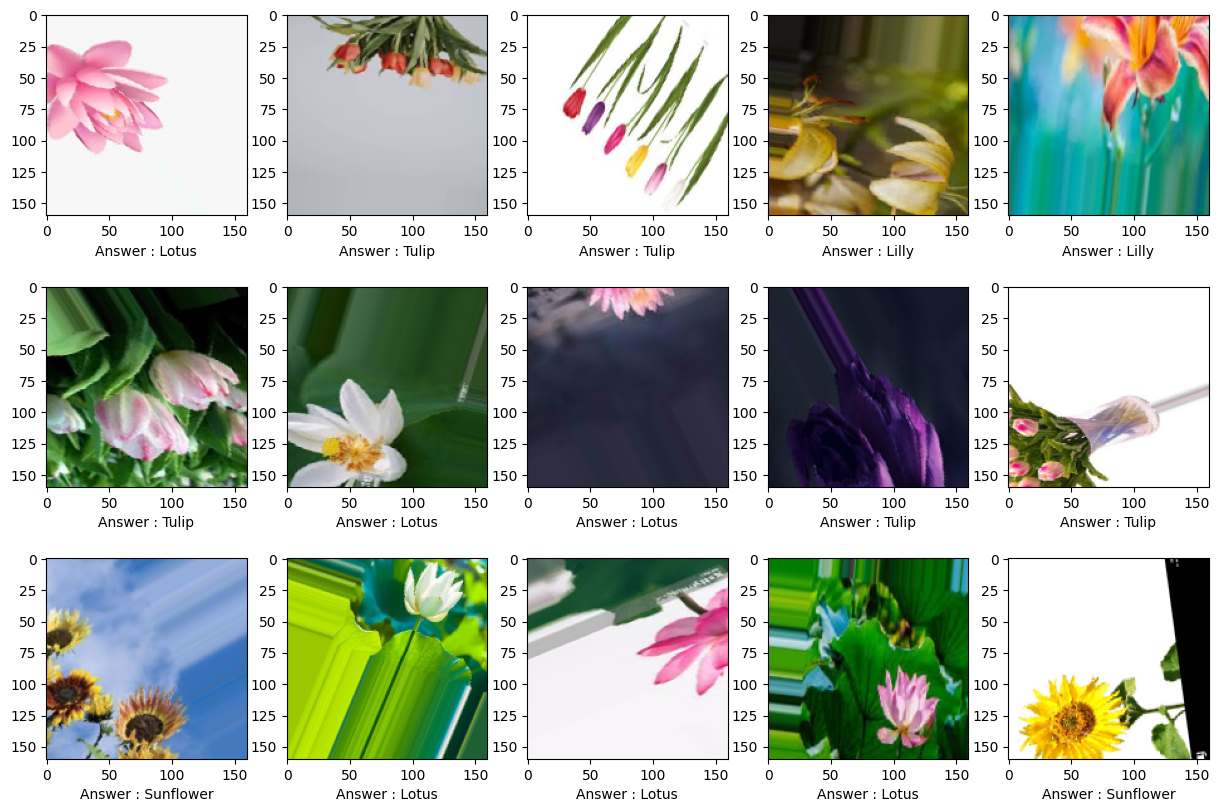

In [13]:
# train 이미지 확인
labels_dict = {0:'Lilly', 1:'Lotus', 2:'Orchid', 3:'Sunflower', 4:'Tulip'}

batch = next(train_gen)

print(batch)
print()

images, labels = batch

print(len(images))
print()
print(len(labels))
print()
print(labels)  # ImageDataGenerator로 전처리 하면 자동으로 원-핫 인코딩으로 준비 됨.
# 따라서 신경망 모델 컴파일 시 loss = 'categorical_crossentropy'로 해야 함.


# train data idx 번째 이미지를 시각화
plt.figure(figsize=(15,10))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
    plt.xlabel(f"Answer : {labels_dict[np.argmax(labels[i])]}")
    #plt.title(f"Label: {labels[0]}")
plt.show()


In [14]:
# 신경망 모델 구성
model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=(160, 160, 3)))
model.add(keras.layers.AveragePooling2D(2)) # 폴링 후 특성 맵 크기(80, 80, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.AveragePooling2D(2)) # 폴링 후 특성 맵 크기(40, 40, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.AveragePooling2D(2)) # 폴링 후 특성 맵 크기(20, 20, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.AveragePooling2D(2)) # 폴링 후 특성 맵 크기(10, 10, 128)

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.AveragePooling2D(2)) # 폴링 후 특성 맵 크기(5, 5, 128)

model.add(keras.layers.Flatten())   # 밀집층에 입력시키기 위해 3차원을 1차원으로 변환.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.4))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

#model.add(keras.layers.Dense(50, activation='relu'))
#model.add(keras.layers.Dropout(0.2))    # 은닉층의 과대적합을 막기 위해 노드로 들어오는 입력을 랜덤으로 막음.

model.add(keras.layers.Dense(5, activation='softmax'))

# 신경망 모델 구조
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 160, 160, 128)     3584      
                                                                 
 average_pooling2d (Average  (None, 80, 80, 128)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 80, 80, 128)       147584    
                                                                 
 average_pooling2d_1 (Avera  (None, 40, 40, 128)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 128)       147584    
                                                                 
 average_pooling2d_2 (Avera  (None, 20, 20, 128)      

In [15]:
# 신경망 모델 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('T3_N11-6_size160_conv5-128-AveragePooling_den2-200_drop-0.2-0.4_epo300_val15.h5', save_best_only=True)

#early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [16]:
# 신경망 모델 훈련
history = model.fit(train_gen, epochs=300, validation_data=val_gen, verbose=1, callbacks=[checkpoint_cb])


Epoch 1/300
120/120 [==============================] - 2083s 17s/step - loss: 1.4662 - accuracy: 0.3425 - val_loss: 1.2856 - val_accuracy: 0.4267
Epoch 2/300


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


120/120 [==============================] - 36s 303ms/step - loss: 1.3003 - accuracy: 0.4533 - val_loss: 1.2550 - val_accuracy: 0.5096
Epoch 3/300
120/120 [==============================] - 37s 305ms/step - loss: 1.2745 - accuracy: 0.4756 - val_loss: 1.2108 - val_accuracy: 0.4874
Epoch 4/300
120/120 [==============================] - 37s 306ms/step - loss: 1.2115 - accuracy: 0.5156 - val_loss: 1.1116 - val_accuracy: 0.5585
Epoch 5/300
120/120 [==============================] - 37s 305ms/step - loss: 1.1860 - accuracy: 0.5218 - val_loss: 1.1602 - val_accuracy: 0.5274
Epoch 6/300
120/120 [==============================] - 37s 304ms/step - loss: 1.1684 - accuracy: 0.5315 - val_loss: 1.0896 - val_accuracy: 0.5659
Epoch 7/300
120/120 [==============================] - 37s 311ms/step - loss: 1.1386 - accuracy: 0.5548 - val_loss: 1.0607 - val_accuracy: 0.5733
Epoch 8/300
120/120 [==============================] - 37s 310ms/step - loss: 1.1067 - accuracy: 0.5616 - val_loss: 1.0577 - val_accurac

In [17]:
# history의 key값 알아보기
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


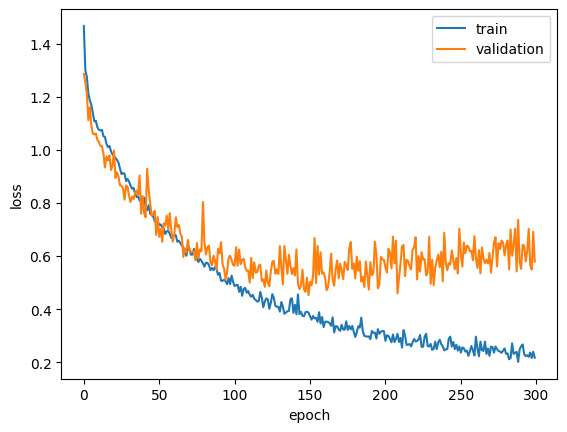

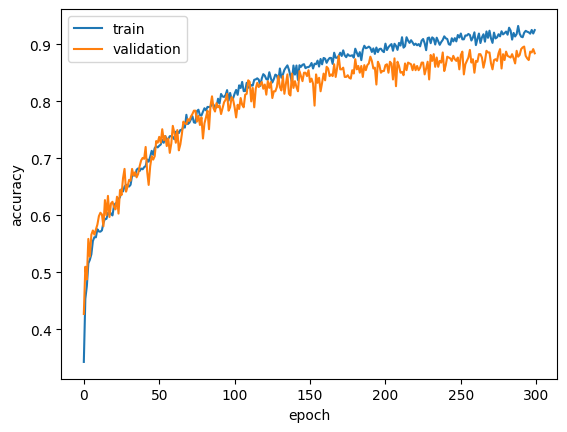

In [18]:
# 훈련 과정 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [19]:
# test 평가
model.evaluate(test_gen)

16/16 [==============================] - 316s 21s/step - loss: 0.5793 - accuracy: 0.9160


[0.5793258547782898, 0.9160000085830688]

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[0. 0. 0. 0. 1.]
32
1/1 [==============================] - 0s 132ms/step
[[4.12282944e-01 1.41525492e-02 2.14805957e-02 7.24423397e-03
  5.44839680e-01]
 [8.11300997e-05 1.81863713e-09 9.99918818e-01 2.49206278e-09
  2.46950336e-08]
 [1.33428730e-05 7.17931243e-08 9.99974370e-01 5.24134347e-10
  1.21015637e-05]
 [6.20291918e-04 2.63833463e-05 9.97693241e-01 5.66466269e-08
  1.66005548e-03]
 [9.99985814e-01 8.41190104e-1

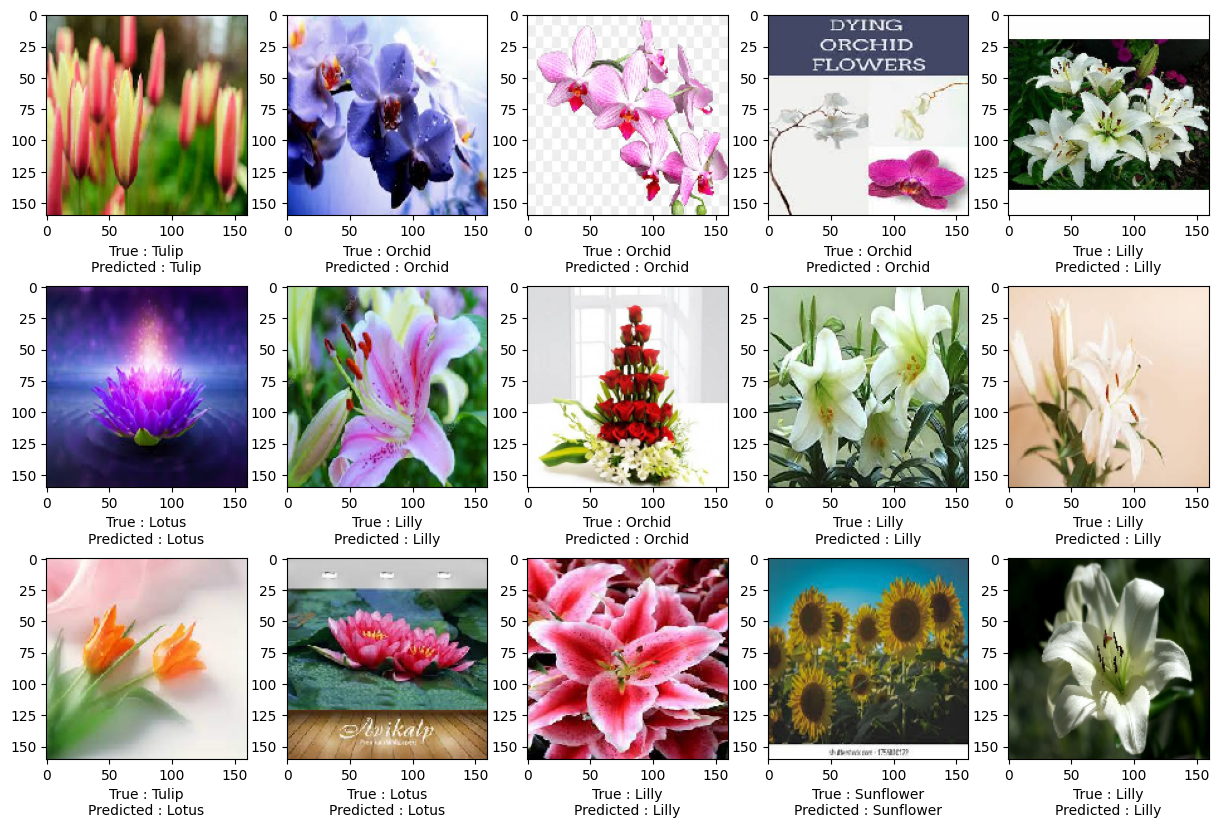

In [20]:
# test 평가 시각화
test_images, test_labels = next(test_gen)

print(test_labels)
print(test_labels[0])
print(len(test_labels))

pred = model.predict(test_images)

print(pred)
print(pred[0])
print(len(pred))

plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(test_images[i])
    true_label = labels_dict[np.argmax(test_labels[i])]
    predicted_label = labels_dict[np.argmax(pred[i])]
    plt.xlabel(f'True : {true_label}\nPredicted : {predicted_label}')

plt.show()